<img src="./img/negritude.PNG">

As part of the 2020 Black History Month celebrations, The Negritude (Black Poets) Project seeks to perform NLP on poetry from 33 extraordinary Black Poets including:
    - Maya Angelou
    - Langston Hughes
    - Gwendolyn Brooks 
    - Amiri Baraka
    - etc.

This project provides:

- A dataset of the Poets's works on poetryfoundation.org.
- Topic Modelling on the data
- Sentiment Analysis of the data
- Clustering and classification of the data



*Topic Modelling follows code from Machine Learning Plus -* 
https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/




In [157]:
# import necessary packages
import pandas as pd
import plotly
import plotly.express as px
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

plotly.offline.init_notebook_mode(connected=True)

import re
import numpy as np
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy



# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
df = pd.read_csv("./data/black_poets.csv")

In [60]:
df.head()

,Poet,Title,Poem
0,LANGSTON HUGHES,50-50,"I’m all alone in this world, she said,\nAin’t ..."
1,LANGSTON HUGHES,Boogie: 1 A.M.,"Good evening, daddy!\nI know you’ve heard\nThe..."
2,LANGSTON HUGHES,Black Maria,"Must be the black Maria\nThat I see,\nThe blac..."
3,LANGSTON HUGHES,BLUES IN STEREO \n,YOUR NUMBER'S COMING OUT! BOUQUETS I'LL SEND Y...
4,LANGSTON HUGHES,Brass Spittoons,"Clean the spittoons, boy.\n Detroit,\n ..."


In [61]:
df.groupby('Poet')['Poem'].count()

Poet
 JAYNE CORTEZ                 7
ALICE MOORE DUNBAR-NELSON     8
AMIRI BARAKA                  7
ANNE SPENCER                  4
ARNA BONTEMPS                 1
AUDRE LORDE                  13
CLAUDE MCKAY                 13
COUNTEE CULLEN                1
DUDLEY RANDALL                2
ETHERIDGE KNIGHT\n           14
GEORGE MOSES HORTON           8
GWENDOLYN BROOKS             28
HAKI R. MADHUBUTI             4
HENRY DUMAS                   8
JAMES BALDWIN                 5
JAMES WELDON JOHNSON\n        7
JEAN TOOMER                  12
JUNE JORDAN\n                14
JUPITER HAMMON                4
LANGSTON HUGHES              31
LUCILLE CLIFTON              26
MARGARET WALKER               5
MAYA ANGELOU                 11
MELVIN B. TOLSON             12
MICHAEL S. HARPER            14
NIKKI GIOVANNI               15
NTOZAKE SHANGE               10
PAUL LAURENCE DUNBAR         17
PHILLIS WHEATLEY              7
QUINCY TROUPE                 1
ROBERT HAYDEN                 7
TER

In [62]:
df2 = df.groupby('Poet').count()
fig = px.bar(df2, x=df2.index, y="Title", labels={'x':'Poet', 'Title':'Number of Poems'})

fig.show()

In [63]:
df['Poem'] = df['Poem'].astype(str)

df['Sentiment Analysis'] = df['Poem'].apply(lambda tweet: 'positive' if TextBlob(tweet).sentiment.polarity > 0  else ('neutral' if TextBlob(tweet).sentiment.polarity == 0 else 'negative'))

In [53]:
df.head()

,Poet,Title,Poem,Sentiment Analysis
0,LANGSTON HUGHES,50-50,"I’m all alone in this world, she said,\nAin’t ...",negative
1,LANGSTON HUGHES,Boogie: 1 A.M.,"Good evening, daddy!\nI know you’ve heard\nThe...",positive
2,LANGSTON HUGHES,Black Maria,"Must be the black Maria\nThat I see,\nThe blac...",positive
3,LANGSTON HUGHES,BLUES IN STEREO \n,YOUR NUMBER'S COMING OUT! BOUQUETS I'LL SEND Y...,positive
4,LANGSTON HUGHES,Brass Spittoons,"Clean the spittoons, boy.\n Detroit,\n ...",positive


In [74]:
df3 = df.groupby(['Poet', 'Sentiment Analysis'])['Poem'].count()

In [75]:
df3.head()

Poet                       Sentiment Analysis
 JAYNE CORTEZ              negative              5
                           positive              2
ALICE MOORE DUNBAR-NELSON  negative              2
                           positive              6
AMIRI BARAKA               negative              4
Name: Poem, dtype: int64

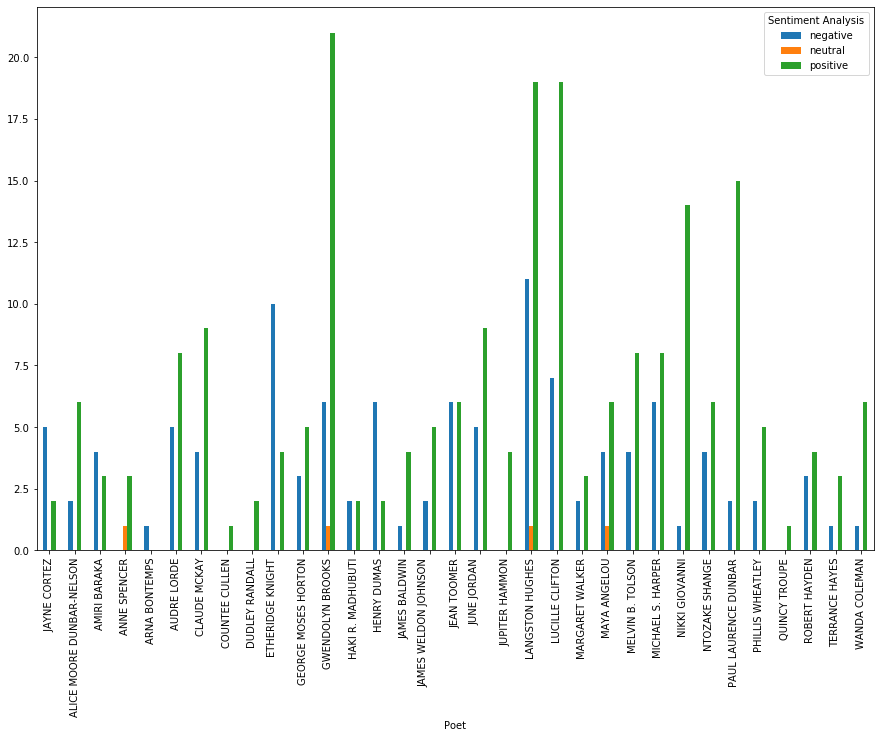

In [76]:
df3.unstack().plot(kind='bar',figsize = (15, 10))

In [78]:
df4 = df.groupby('Sentiment Analysis').count()

In [80]:
df4

,Poet,Title,Poem
Sentiment Analysis,,,
negative,110,110,110
neutral,4,4,4
positive,213,213,213


In [81]:
fig = px.pie(df4, values='Poet', names=df4.index)
fig.show()

In [121]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'go','to', "I'm", 'in', 'this'])

In [147]:
data = df.Poem.values.tolist()

In [148]:
data = [re.sub('\n', ' ', sent) for sent in data]


In [149]:
pprint(data[:1])


['I’m all alone in this world, she said, Ain’t got nobody to share my bed, '
 'Ain’t got nobody to hold my hand— The truth of the matter’s I ain’t got no '
 'man.  Big Boy opened his mouth and said, Trouble with you is You ain’t got '
 'no head! If you had a head and used your mind You could have me with you All '
 'the time.  She answered, Babe, what must I do?  He said, Share your bed— And '
 'your money, too.']


In [125]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['all', 'alone', 'in', 'this', 'world', 'she', 'said', 'ain', 'got', 'nobody', 'to', 'share', 'my', 'bed', 'ain', 'got', 'nobody', 'to', 'hold', 'my', 'hand', 'the', 'truth', 'of', 'the', 'matter', 'ain', 'got', 'no', 'man', 'big', 'boy', 'opened', 'his', 'mouth', 'and', 'said', 'trouble', 'with', 'you', 'is', 'you', 'ain', 'got', 'no', 'head', 'if', 'you', 'had', 'head', 'and', 'used', 'your', 'mind', 'you', 'could', 'have', 'me', 'with', 'you', 'all', 'the', 'time', 'she', 'answered', 'babe', 'what', 'must', 'do', 'he', 'said', 'share', 'your', 'bed', 'and', 'your', 'money', 'too']]


In [126]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['all', 'alone', 'in', 'this', 'world', 'she', 'said', 'ain_got', 'nobody', 'to', 'share', 'my', 'bed', 'ain_got', 'nobody', 'to', 'hold', 'my', 'hand', 'the', 'truth', 'of', 'the', 'matter', 'ain_got', 'no', 'man', 'big', 'boy', 'opened', 'his', 'mouth', 'and', 'said', 'trouble', 'with', 'you', 'is', 'you', 'ain_got', 'no', 'head', 'if', 'you', 'had', 'head', 'and', 'used', 'your', 'mind', 'you', 'could', 'have', 'me', 'with', 'you', 'all', 'the', 'time', 'she', 'answered', 'babe', 'what', 'must', 'do', 'he', 'said', 'share', 'your', 'bed', 'and', 'your', 'money', 'too']


In [127]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [128]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download e
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['alone', 'say', 'get', 'share', 'bed', 'get', 'hold', 'hand', 'truth', 'matter', 'get', 'man', 'big', 'boy', 'open', 'mouth', 'say', 'trouble', 'get', 'head', 'head', 'use', 'mind', 'could', 'time', 'answer', 'must', 'say', 'share', 'bed', 'money']]


In [129]:
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 4), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 3), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1)]]


In [130]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('alone', 1),
  ('answer', 1),
  ('bed', 2),
  ('big', 1),
  ('boy', 1),
  ('could', 1),
  ('get', 4),
  ('hand', 1),
  ('head', 2),
  ('hold', 1),
  ('man', 1),
  ('matter', 1),
  ('mind', 1),
  ('money', 1),
  ('mouth', 1),
  ('must', 1),
  ('open', 1),
  ('say', 3),
  ('share', 2),
  ('time', 1),
  ('trouble', 1),
  ('truth', 1),
  ('use', 1)]]

In [131]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [132]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"know" + 0.008*"man" + 0.008*"love" + 0.007*"see" + 0.007*"make" + '
  '0.007*"get" + 0.006*"say" + 0.006*"would" + 0.006*"must" + 0.006*"take"'),
 (1,
  '0.042*"morning" + 0.011*"fish" + 0.010*"art" + 0.009*"rooster" + '
  '0.005*"strip" + 0.004*"somewhere" + 0.004*"world" + 0.004*"blue" + '
  '0.004*"sun" + 0.004*"care"'),
 (2,
  '0.012*"come" + 0.009*"see" + 0.009*"black" + 0.006*"dream" + 0.006*"say" + '
  '0.006*"face" + 0.006*"let" + 0.006*"way" + 0.006*"leave" + 0.005*"night"'),
 (3,
  '0.013*"beautiful" + 0.009*"pigeon" + 0.007*"mask" + 0.007*"break" + '
  '0.005*"organize" + 0.004*"thief" + 0.004*"sew" + 0.004*"many" + '
  '0.004*"somewhere" + 0.004*"death"'),
 (4,
  '0.017*"say" + 0.011*"man" + 0.007*"light" + 0.007*"know" + 0.006*"go" + '
  '0.005*"black" + 0.005*"wrong" + 0.005*"eye" + 0.004*"tell" + 0.004*"burn"')]


In [133]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.



Perplexity:  -8.267319804194676


In [134]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.29451424744183646


In [135]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

c:\users\acham\appdata\local\programs\python\python37\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.131436  0.056875       1        1  38.052788
2     -0.118874 -0.001486       2        1  30.239269
4     -0.069365 -0.029848       3        1  21.635962
1      0.127848 -0.158297       4        1   5.413330
3      0.191827  0.132756       5        1   4.658650, topic_info=     Category        Freq       Term       Total  loglift  logprob
632   Default   85.000000    morning   85.000000  30.0000  30.0000
86    Default   38.000000  beautiful   38.000000  29.0000  29.0000
17    Default  242.000000        say  242.000000  28.0000  28.0000
361   Default   57.000000      death   57.000000  27.0000  27.0000
127   Default   27.000000       fish   27.000000  26.0000  26.0000
...       ...         ...        ...         ...      ...      ...
580    Topic5    4.775405        sit   61.613934   0.5090  -5.7086
2486   Topic5    4.682000       burn   49.424477   0.7097  -5.7283
512    Topic5    4.462392      sound   30.242249   1.1529  -5.7764
38     Topic5    4.249298      black  165.680954  -0.5969  -5.8253
823    Topic5    3.882347      grief   10.725555   2.0503  -5.9156

[352 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1232      4  0.821674   afraid
1810      5  0.838760  african
6707      5  0.937527    alert
906       2  0.183697      ant
906       4  0.734790      ant
...     ...       ...      ...
6629      4  0.802178    yazoo
242       1  0.782407     year
242       2  0.164717     year
242       3  0.041179     year
5599      5  0.668788   zombie

[558 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 5, 2, 4])